In [94]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical

# Step 1: Load the dataset
# Assume 'diabetes.csv' is in the current directory
data = pd.read_csv('D:\\Fourth_Year\\DL\\Deep Learning - Datasets\\diabetes.csv')

# Step 2: Prepare the data
# Separate features and target
X = data.iloc[:, :-1].values  # All columns except the last (features)
y = data.iloc[:, -1].values   # The last column (target)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [95]:
data.shape

(768, 9)

In [82]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [83]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [85]:
# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [86]:
# Step 3: Build a simple neural network model
#model = keras.Sequential([
#    layers.Dense(64, input_shape=(X_train.shape[1],), activation='relu'),
#    layers.Dense(32, activation='relu'),
#    layers.Dense(1, activation='sigmoid')  # Sigmoid for binary classification
#])

model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),         # Define input shape explicitly,Flattens 28x28 image into a 1D vector
    layers.Flatten(),
    #layers.Dense(128, activation='relu'),
    #layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),  # Fully connected layer with 64 neurons, using ReLU activation
    #layers.Dropout(0.5),
    layers.Dense(32, activation='relu'),   # Another dense layer with 32 neurons, using ReLU activation
    layers.Dense(1, activation='sigmoid')  # Output layer with 10 neurons (for 10 classes), using Softmax activation
])


In [87]:
# Step 4: Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [88]:
# Step 5: Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test,y_test))


Epoch 1/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.5196 - loss: 0.7007 - val_accuracy: 0.7403 - val_loss: 0.5701
Epoch 2/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7683 - loss: 0.5371 - val_accuracy: 0.7597 - val_loss: 0.5192
Epoch 3/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7705 - loss: 0.4715 - val_accuracy: 0.7532 - val_loss: 0.5040
Epoch 4/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7671 - loss: 0.4713 - val_accuracy: 0.7662 - val_loss: 0.5041
Epoch 5/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7966 - loss: 0.4424 - val_accuracy: 0.7662 - val_loss: 0.5063
Epoch 6/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7968 - loss: 0.4131 - val_accuracy: 0.7727 - val_loss: 0.5051
Epoch 7/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7656 - loss: 0.4501 - val_accuracy: 0.7727 - val_loss: 0.5173
Epoch 8/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7954 - loss: 0.4278 - val_accuracy: 0.7597 - val_loss

In [89]:
# Step 6: Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7198 - loss: 0.5941
Test Loss: 0.6004849672317505
Test Accuracy: 0.7402597665786743


In [90]:
print("Traning Accuracy: ", history.history['accuracy'][49])

Traning Accuracy:  0.8729641437530518


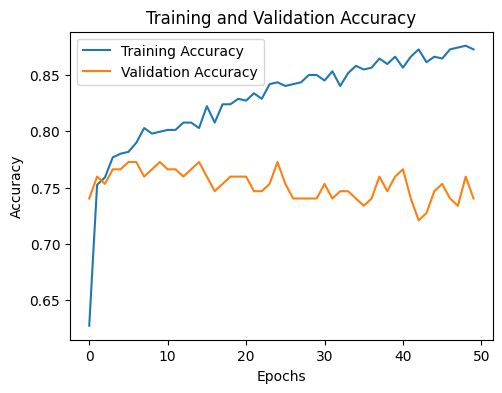

In [91]:
# Plot training and validation accuracy and loss if needed
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.show()

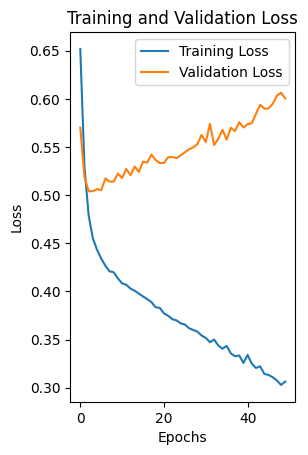

In [92]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()

In [93]:
import numpy as np

# Example input: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age]
input_data = np.array([[2, 130, 70, 30, 0, 30.0, 0.5, 25]])  # Replace with your values

# Step 1: Standardize the input data
scaled_input = scaler.transform(input_data)  # Use the same scaler as used for training

# Step 2: Make a prediction
prediction = model.predict(scaled_input)

# Step 3: Interpret the prediction
predicted_label = (prediction >= 0.5).astype(int)  # Convert to binary label based on threshold

print(f"Predicted Probability: {prediction[0][0]}")
print(f"Predicted Label: {predicted_label[0][0]} (0: No Diabetes, 1: Diabetes)")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
Predicted Probability: 0.5383099317550659
Predicted Label: 1 (0: No Diabetes, 1: Diabetes)
